<a href="https://colab.research.google.com/github/zaedulislam/ConU_INSE_6220-Advanced_Statistical_Approaches_to_Quality/blob/main/Tutorial%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Python Modules

In [1]:
import numpy as np

# Open source data analysis and manipulation library for Python
import pandas as pd

# matplotlib - The Python library is needed to plot nice charts
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)

# 'seaborn' - a matplotlib based statistical graphical library
import seaborn as sns; 
sns.set() # Use seaborn plotting style defaults


from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

from google.colab import files

# Download as a CSV File

In [2]:
data = np.array([
                [1360.00, 150, 1045.50, 1056.25, 1692.00], 
                [1292.25, 112, 954.75, 1173.75, 1558.75],
                [1402.00, 88, 939.25, 1140.00, 1554.50],
                [1375.50, 80, 948.25, 1092.00, 1583.75],
                [1272.25, 51, 835.50, 1205.00, 1490.00]
                 ])

dataset = pd.DataFrame(data, columns=['X1', 'X2', 'X3', 'X4', 'X5'])
print(dataset)

        X1     X2       X3       X4       X5
0  1360.00  150.0  1045.50  1056.25  1692.00
1  1292.25  112.0   954.75  1173.75  1558.75
2  1402.00   88.0   939.25  1140.00  1554.50
3  1375.50   80.0   948.25  1092.00  1583.75
4  1272.25   51.0   835.50  1205.00  1490.00


In [ ]:
dataset.to_csv('airquality.csv')
files.download('airquality.csv')

# Upload Files into Colaboratory

In [4]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 14G6PwwuXRsDuMnyDNtq7xVZHSWTNvrh5 to 14G6PwwuXRsDuMnyDNtq7xVZHSWTNvrh5 (4)
User uploaded file "14G6PwwuXRsDuMnyDNtq7xVZHSWTNvrh5" with length 198 bytes


In [5]:
# Read CSV file into dataframe
df = pd.read_csv('airquality.csv', index_col=0)

##!pip install xlrd
##df = pd.read_excel('airquality.xls')
print(df.head())

        X1     X2       X3       X4       X5
0  1360.00  150.0  1045.50  1056.25  1692.00
1  1292.25  112.0   954.75  1173.75  1558.75
2  1402.00   88.0   939.25  1140.00  1554.50
3  1375.50   80.0   948.25  1092.00  1583.75
4  1272.25   51.0   835.50  1205.00  1490.00


In [6]:
# m,n=df.shape #size of data
#X = df.ix[:,0:n].values # Feature matrix
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X) #normalize data

# Normalize data

In [7]:
# The data can be normalized by subtracting the mean (µ) of each feature and a division by the standard deviation (σ).
df = (df - df.mean()) / df.std()

print(df)

         X1        X2        X3        X4        X5
0  0.352402  1.448667  1.352851 -1.282971  1.578665
1 -0.865722  0.425445  0.135486  0.671003 -0.231637
2  1.107549 -0.220801 -0.072438  0.109755 -0.289377
3  0.631087 -0.436216  0.048292 -0.688464  0.108007
4 -1.225316 -1.217096 -1.464192  1.190677 -1.165658


In [8]:
# Displaying DataFrame columns
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5'], dtype='object')

In [9]:
# Some basic information about each column in the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      5 non-null      float64
 1   X2      5 non-null      float64
 2   X3      5 non-null      float64
 3   X4      5 non-null      float64
 4   X5      5 non-null      float64
dtypes: float64(5)
memory usage: 240.0 bytes


# Observations and variables

In [10]:
observations = list(df.index)
print(observations)

[0, 1, 2, 3, 4]


In [11]:
variables = list(df.columns)
print(variables)

['X1', 'X2', 'X3', 'X4', 'X5']


# Data Visualisation

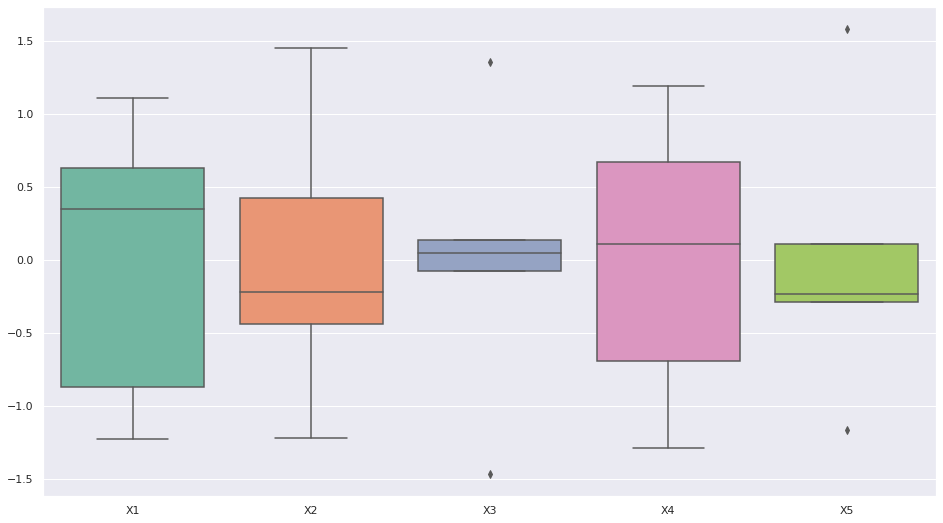

In [12]:
sns.boxplot(data=df, orient="v", palette="Set2")

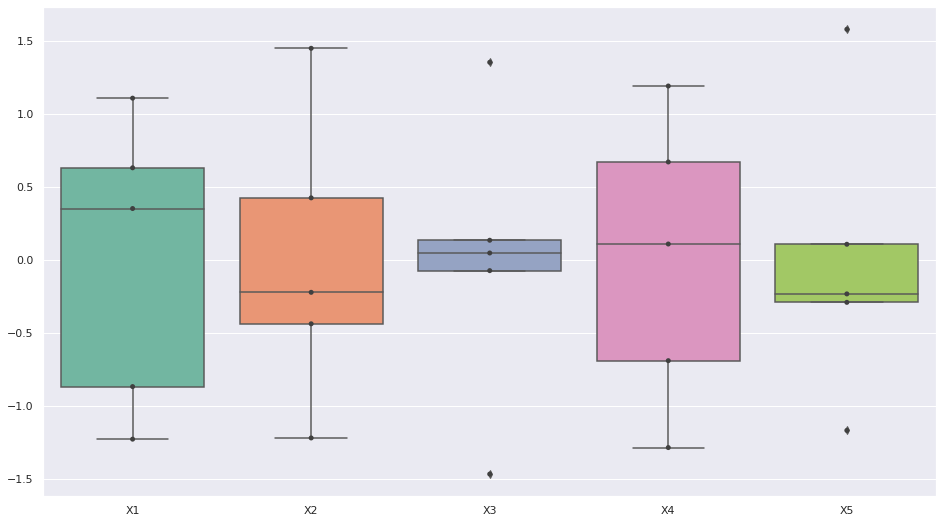

In [13]:
# Use swarmplot() to show the datapoints on top of the boxes:

plt.figure(figsize=(16, 9))   
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.swarmplot(data=df, color=".25") 

## Pair plot

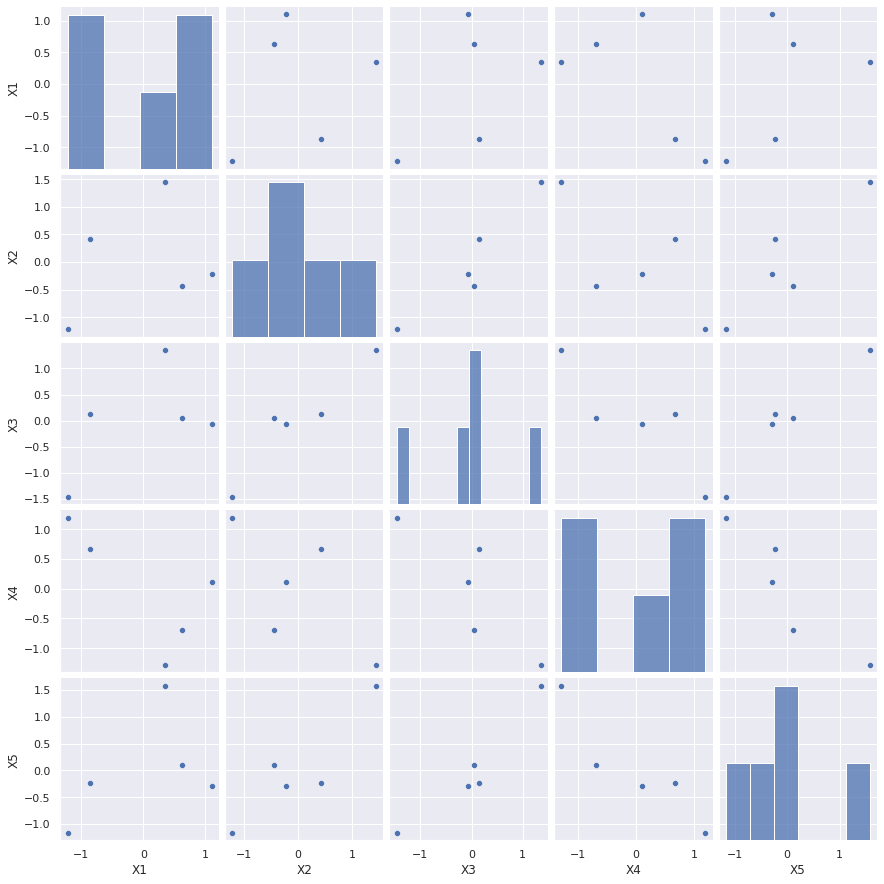

In [14]:
sns.pairplot(df)

# Covariance

Text(0.5, 1.0, 'Covariance matrix')

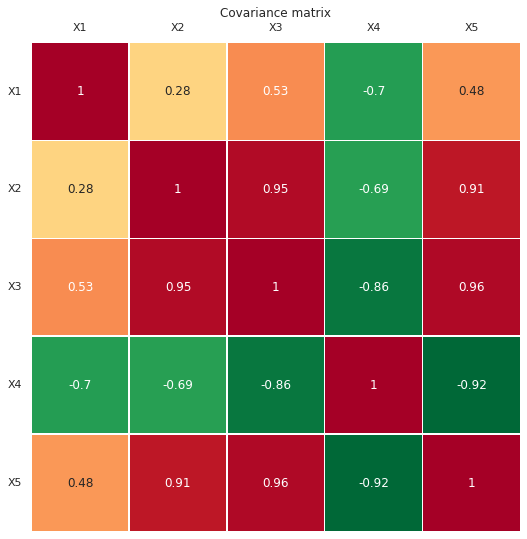

In [15]:
dfc = df - df.mean() #centered data
plt. figure()
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Covariance matrix')

# Principal Component Analysis (PCA)

## Load Dataset

In [75]:
irisdata = load_iris()
X, y = irisdata["data"], irisdata["target"]
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [76]:
print("Feaures/Columns:", irisdata.feature_names)

Feaures/Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [80]:
print("Target:", irisdata.target_names)

Target: ['setosa' 'versicolor' 'virginica']


## First Feature/Column

In [81]:
print(X[:, 0])

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]


## Second Feature/Column

In [82]:
print(X[:, 1])

[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3
 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7 2.2 2.5 3.2 2.8
 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4 3.1 2.3 3.  2.5
 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8 3.3 2.7 3.  2.9 3.  3.  2.5 2.9
 2.5 3.6 3.2 2.7 3.  2.5 2.8 3.2 3.  3.8 2.6 2.2 3.2 2.8 2.8 2.7 3.3 3.2
 2.8 3.  2.8 3.  2.8 3.8 2.8 2.8 2.6 3.  3.4 3.1 3.  3.1 3.1 3.1 2.7 3.2
 3.3 3.  2.5 3.  3.4 3. ]


## Show any Two Features

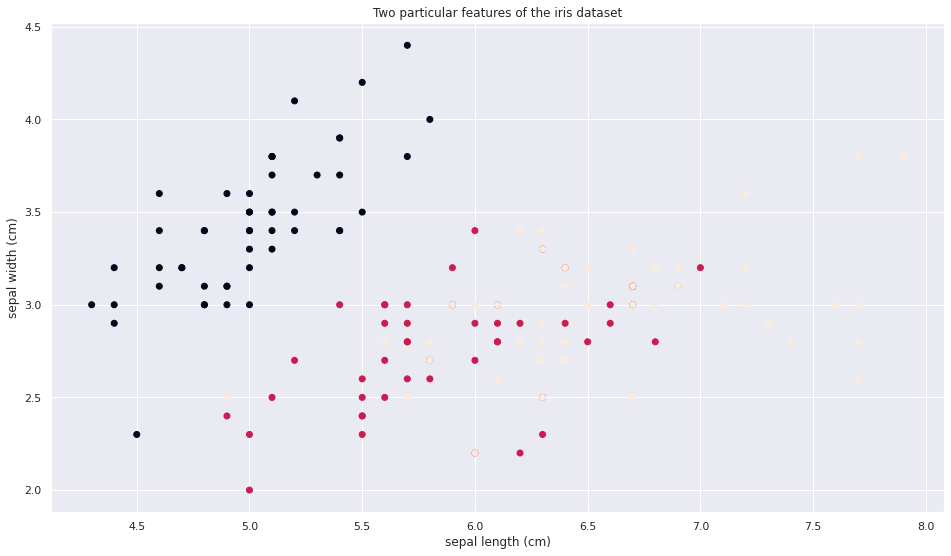

In [83]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two particular features of the iris dataset")
plt.show()

## Show any Three Features

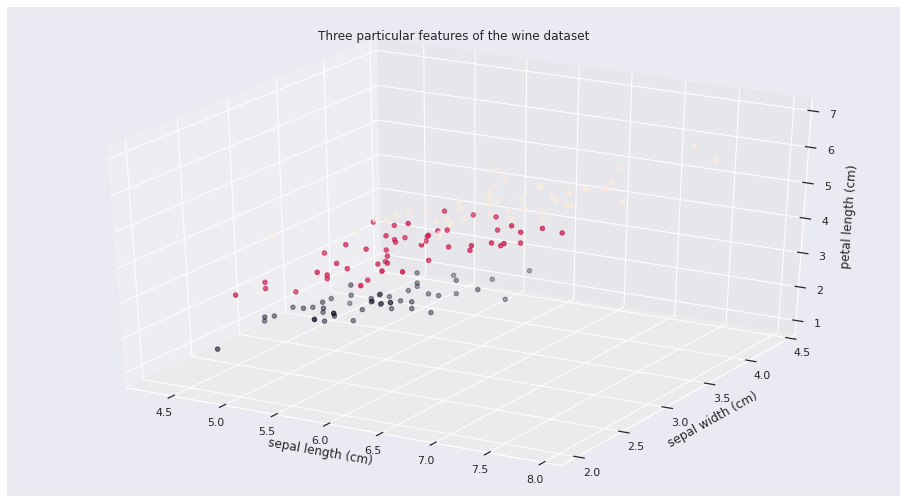

In [84]:
ax = plt.figure()
ax = ax.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.set_xlabel(irisdata["feature_names"][0])
ax.set_ylabel(irisdata["feature_names"][1])
ax.set_zlabel(irisdata["feature_names"][2])
ax.set_title("Three particular features of the wine dataset")
plt.show()

## Show First Two Principal Components without Scaler

Number of principal components: 4


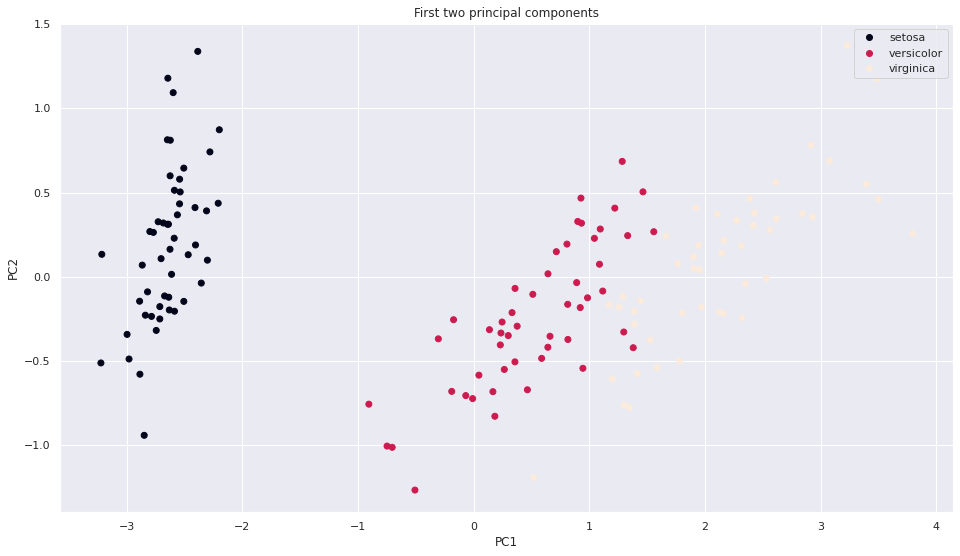

In [85]:
pca = PCA()
Z = pca.fit_transform(X)

print("Number of principal components:", pca.n_components_)

plot = plt.scatter(Z[:,0], Z[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0], labels=list(irisdata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components")
plt.show()

## Eigenvectors

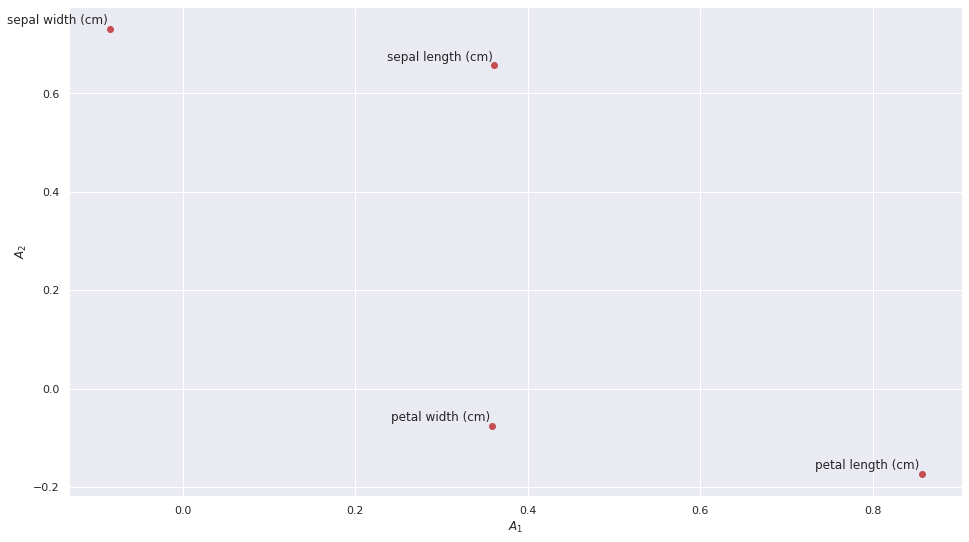

In [105]:
A = pca.components_.T 

plt. figure()
plt.scatter(A[:, 0],A[:, 1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')

for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

## Visualizing the Explained Variance



### Scree plot

Text(0, 0.5, 'Proportion of Variance Explained')

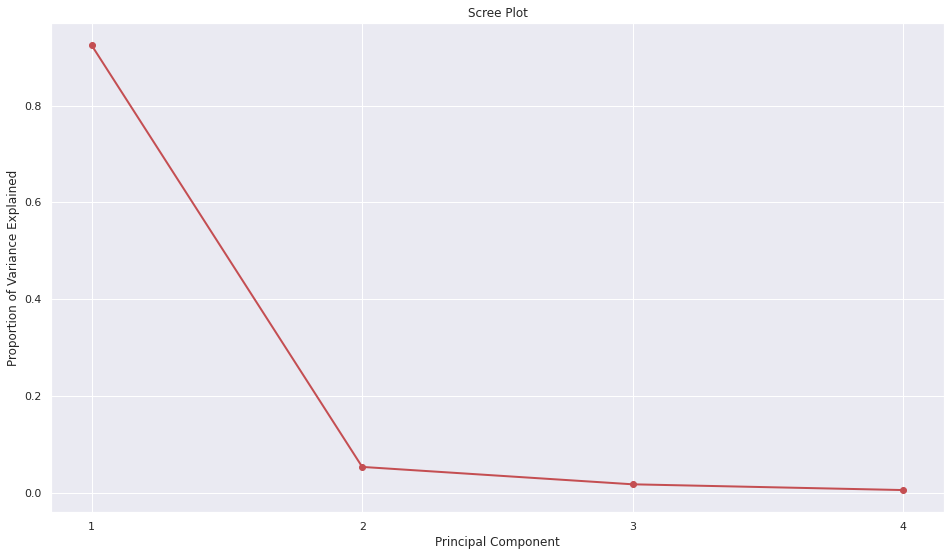

In [87]:
Lambda = pca.explained_variance_ 

plt. figure()
x = np.arange(pca.n_components_) + 1

plt.plot(x, pca.explained_variance_ratio_, 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')

## Explaiend Variance

Proportion of Variance Explained :  [0.92461872 0.05306648 0.01710261 0.00521218]
Explained Variances (Percentage):  [92.46187232  5.30664831  1.71026098  0.52121839]
Cumulative Prop. Variance Explained:  [0.92461872 0.97768521 0.99478782 1.        ]


Text(0, 0.5, 'Cumulative explained variance')

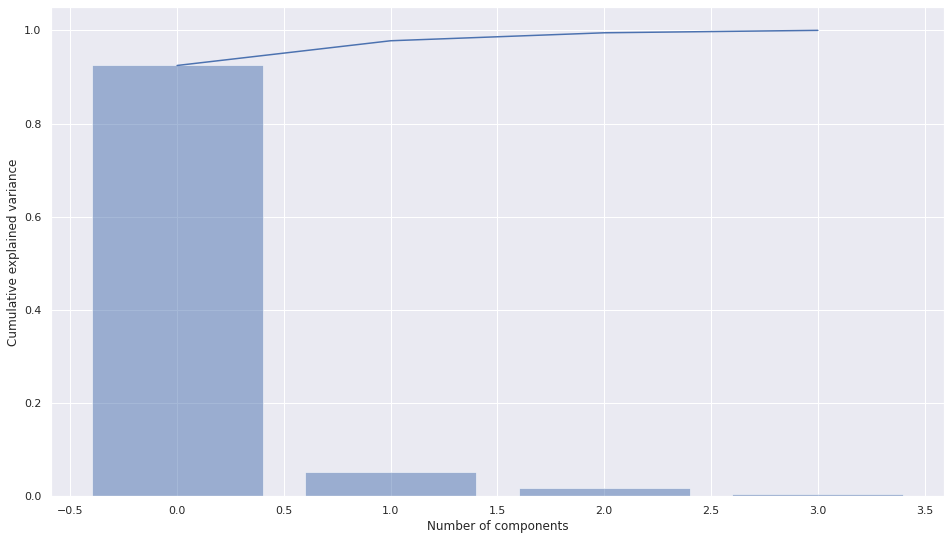

In [88]:
ell = pca.explained_variance_ratio_
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)
print ("Explained Variances (Percentage): ", pca.explained_variance_ratio_ * 100)  
A1 = A[:, 0] 
A2 = A[:, 1]
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

## Biplot

In [89]:
observations = np.arange((X.shape)[0])
print(observations)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]


In [91]:
variables = irisdata.feature_names
print(variables)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [99]:
print(A.shape)

(4, 4)


In [101]:
print(A)

[[ 0.36138659  0.65658877 -0.58202985 -0.31548719]
 [-0.08452251  0.73016143  0.59791083  0.3197231 ]
 [ 0.85667061 -0.17337266  0.07623608  0.47983899]
 [ 0.3582892  -0.07548102  0.54583143 -0.75365743]]


In [100]:
print(Z.shape)

(150, 4)


In [104]:
print(max(Z[:, 0]))

3.795645422072883


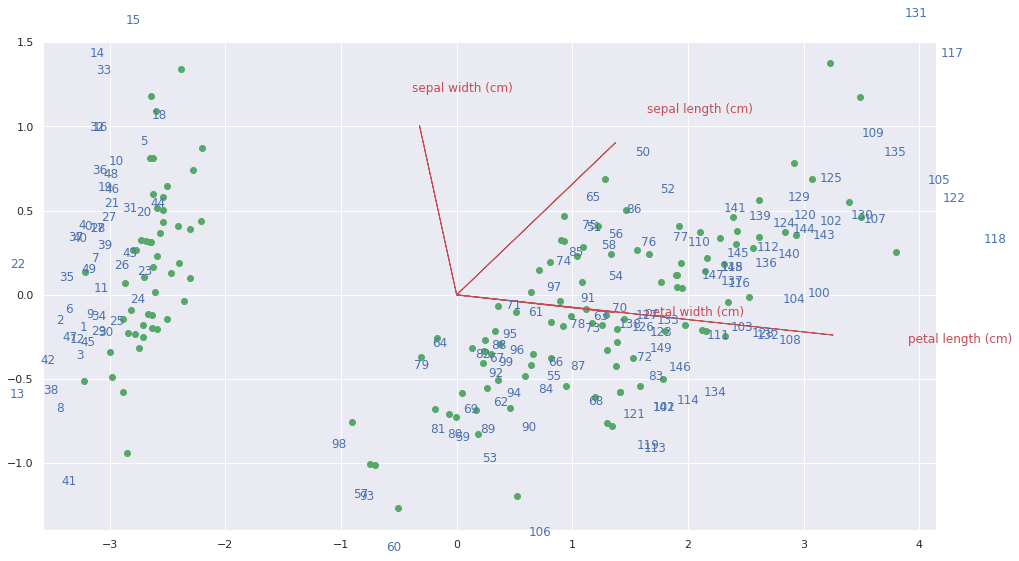

In [98]:
# 0,1 denote PC1 and PC2; change values for other PCs
# 2 Eigenvectors
A1 = A[:, 0] 
A2 = A[:, 1]

# 2 PCAs
Z1 = Z[:, 0] 
Z2 = Z[:, 1]

plt. figure()
for i in range(len(A1)):
    # Arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i] * max(Z1), A2[i] * max(Z2),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(A1[i]* max(Z1) * 1.2, A2[i] * max (Z2) *1.2, variables[i], color='r')

for i in range(len(Z1)):
    # Circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='g', marker='o')
    plt.text(Z1[i] * 1.2, Z2[i] * 1.2,  observations[i], color='b')

## Heatmap

Text(0.5, 1.0, 'Principal components')

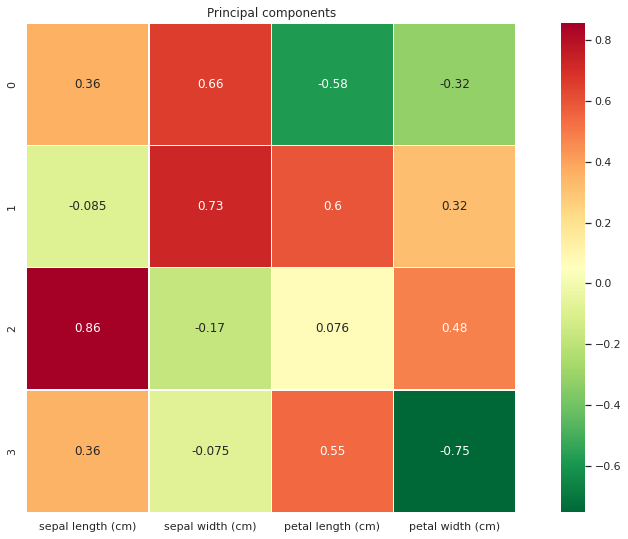

In [106]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')